**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town

2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per \$10,000
PTRATIO - pupil-teacher ratio by town
11. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in \$1000's

**Linear Regression Analysis**

 We are going to use Linear Regression Model for this analysis. But first we need to Explore the Dataset.
 We need to load some packages for exploration

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import pickle

We then Load the Boston Datasets from scikit library.

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_data =boston.data 

c:\Users\David Sanchez Jnr\Desktop\Machine Learning Projects\BostonHousePricing\BostonHousePricing\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.valu

Convert the boston data into dataframe and print the head of the DataFrame (first five rows of the boston data)

In [43]:
boston_df = pd.DataFrame(boston_data,columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see from the dataframe that the **independent** varibles for our analysis are **"CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT"** but the **dependent** variable **"MEDV"** for the analysis is not in the frame. So we add a new Column
"MEDV" to the frame and check the head again.

In [44]:
boston_df["Price"] = boston.target

In [45]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data PreProcessing**

Our next step is to check for any missing value in our data. Here we count the number of missing values for each feature in our dataframe. 

In [46]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [47]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

**Exploratory Data Analysis**

Since there are no missing values in the data, we use visualizations to understand the relationship between the dependent varible and the independent variables.

First, We plot the distribution of the dependent variable **MEDV** using the seaborn library.

<AxesSubplot: xlabel='Price', ylabel='Count'>

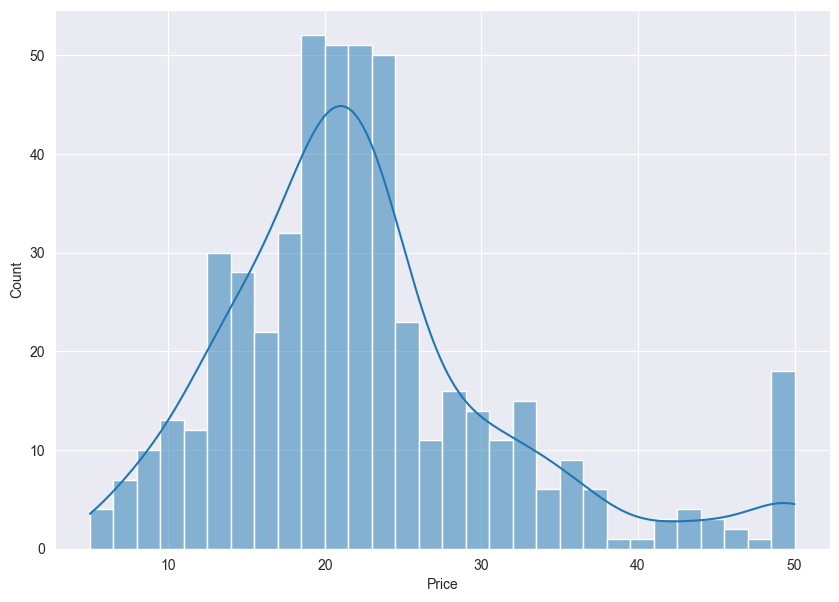

In [48]:
plt.figure(figsize=(10,7))
sns.histplot(boston_df["Price"],kde=True,bins = 30)

We see from the above plot that the price of houses "**MEDV**" are normally distributed with some few outliers.

<AxesSubplot: >

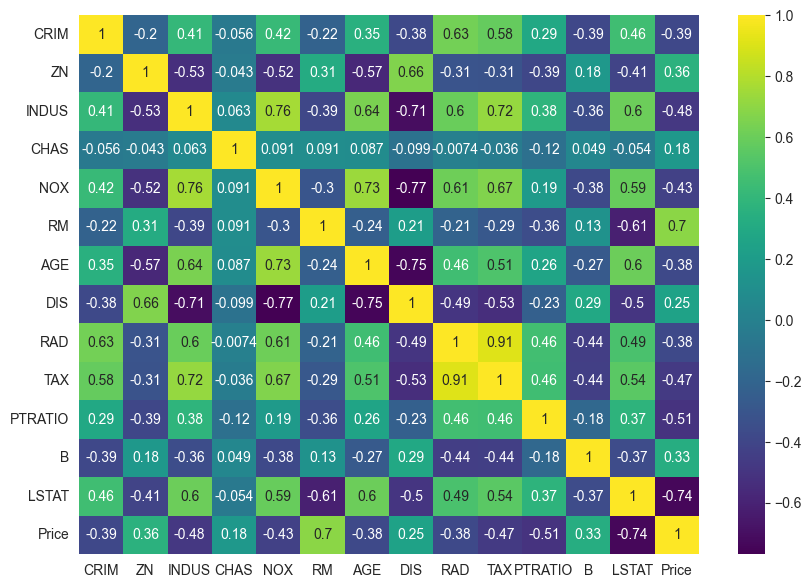

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(boston_df.corr(),cmap = "viridis",annot=True)

The Second plot is a correlation matrix plot that measures the linear relationshipss between the variables The correlation coeffecient ranges from -1 to 1. If the value is  close to 1, it means there is a strong positive correlation between the two variables. On the other hand,
when the value is  close to -1, it means there is a strong negative correlation.




We then plot the independent variables against the dependent variables and observe their properties.

**Observations**

- Prices rise in lockstep with the value of the RM. There are few outliers.

- With a rise in LSTAT, prices tend to fall. Despite the fact that it does not appear to be a straight line.

Text(0.5, 1.0, 'Scatter of LSTAT against MEDV')

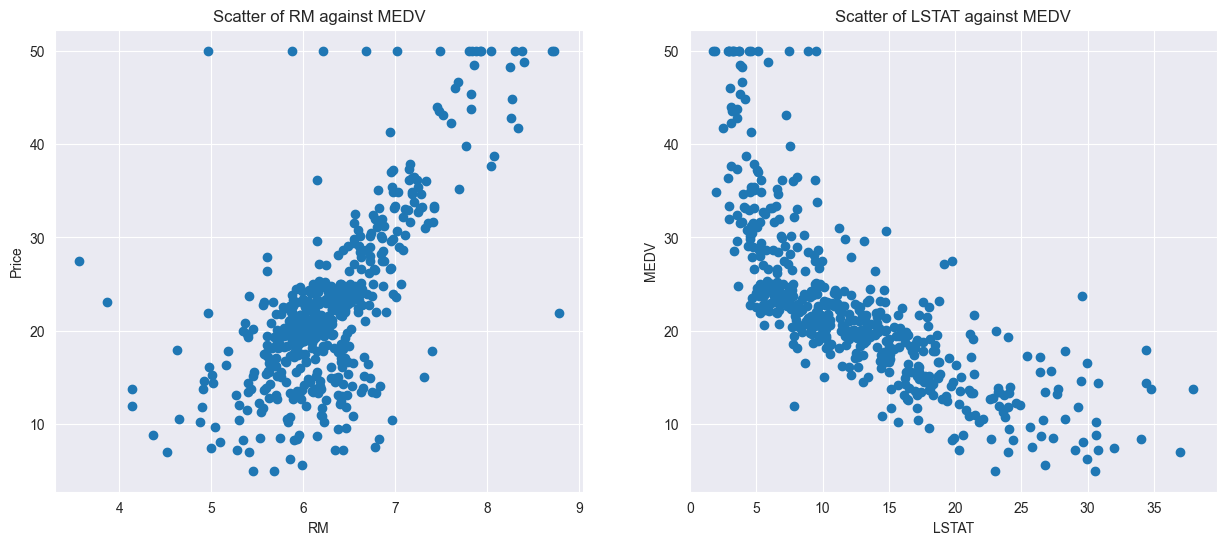

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(boston_df["RM"],boston_df["Price"])
axes[0].set_xlabel("RM")
axes[0].set_ylabel("Price")
axes[0].set_title("Scatter of RM against MEDV")

axes[1].scatter(boston_df["LSTAT"],boston_df["Price"])
axes[1].set_xlabel("LSTAT")
axes[1].set_ylabel("MEDV")
axes[1].set_title("Scatter of LSTAT against MEDV")

Now that we've explored the data a bit, let's go ahead and build our regression model.We split the data into training and testing sets.

### Standardization

## Data Pre-Processing

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = boston_df.iloc[:,:-1]
y = boston_df["Price"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [54]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
scale = pickle.dump(scaler,open("scaler.pkl","wb"))

## Model Training

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
# Fitting the Model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
# print intercept
lm.intercept_

22.339830508474606

In [58]:
# Coeffecients
coeff_df =pd.DataFrame(lm.coef_,index = boston.feature_names,columns=["Coeffecients"])

In [59]:
coeff_df.head()

,Coeffecients
CRIM,-0.838843
ZN,1.428401
INDUS,0.405327
CHAS,0.679425
NOX,-2.530391


From the above model, we can write our regression equation as 
- ***Price = 22.6467 -1.135027(CRIM) + 1.158145(ZN)+...***.



### MODEL EVALUATION

Model Evaluation determines generalized correctness for previously unknown data. It also determines whether or not our model is overfitting. Overfitted models perform well on test datasets but perform badly on real-world datasets. As a consequence, if there is no noticeable difference in the accuracy of the train and test sets, we may deem our model deployable.

In [60]:
# Make Predictions with Test Data
predictions = lm.predict(X_test)

<AxesSubplot: xlabel='Price'>

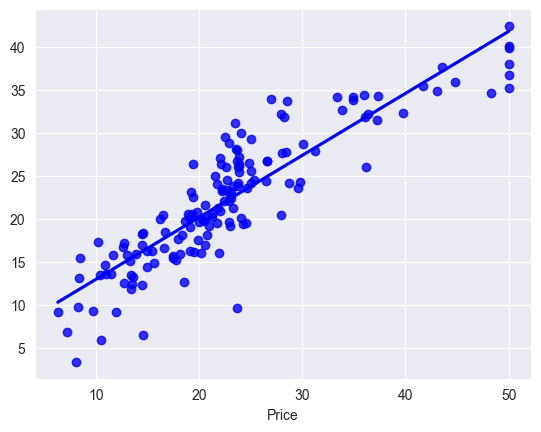

In [61]:
# regression plot
sns.regplot(x=y_test,y = predictions, color="blue",ci=None,)

<AxesSubplot: xlabel='Price', ylabel='Count'>

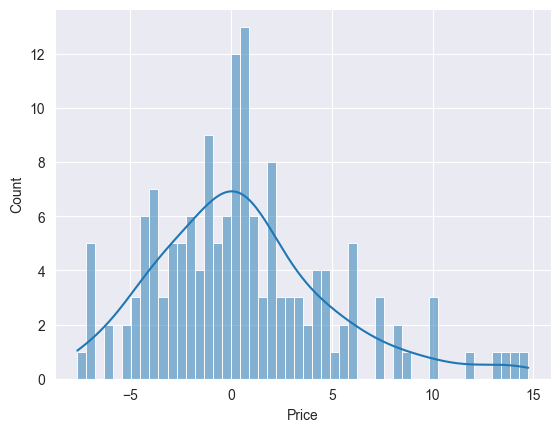

In [62]:
# Residual Plot
sns.histplot((y_test-predictions),bins=50,kde = True)

In [63]:
from sklearn import metrics

In [64]:
print("\n","---Accuracy For Test Data---","\n")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('R2 Score:', metrics.r2_score(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


 ---Accuracy For Test Data--- 

MAE: 3.2888173968749674
MSE: 20.01851020128518
R2 Score: 0.7815872322862858
RMSE: 4.4742049798020185


Because there isn't much of a difference in the R2 scores of the Training and Test sets. The R2 value is close to one. As a result, we may infer that the model is not overfitted.

## Tree-Based Models

In [65]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [66]:
# random forest model
rf_model = RandomForestRegressor(random_state=200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8855941883653167

In [67]:
# Random Forest Predictions
rf_pred = rf_model.predict(X_test)

In [68]:
# Performance Metrics for Random Forest Model
print("\n","---Accuracy For Test Data For Random Forest---","\n")
print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('R2 Score:', metrics.r2_score(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))


 ---Accuracy For Test Data For Random Forest--- 

MAE: 2.433723684210527
MSE: 10.485805986842108
R2 Score: 0.8855941883653167
RMSE: 3.2381794247450384


In [69]:
# Gradient Boosting Model
model = GradientBoostingRegressor(random_state=2,n_estimators=60)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9044640129238057

In [70]:
# Gradient Predoctions
pred = model.predict(X_test)

In [71]:
# Performance Metrics for Gradient Boosting Model
print("\n","---Accuracy For Test Data For Gradient Boosting Model---","\n")
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('R2 Score:', metrics.r2_score(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


 ---Accuracy For Test Data For Gradient Boosting Model--- 

MAE: 2.308669439292026
MSE: 8.756301895232827
R2 Score: 0.9044640129238057
RMSE: 2.9591049145362907


- Comparing the three models above, Gradient Boosting Model had the highest coefficient of determination. $R^2 = 0.90$,  which means about 90% of the variations in price of houses is explained by the independent variables. 

- Looking at the distribution of the target MEDV, we can see that values are capped at 50,000. So, if I use this model to calculate the price that I'm going to buy or sell, on average, I will lose or gain about $2,300; that's probably not true bad. Apparently, on average.

Before we will make predictions on this ,model we will plot the residuals to see if the model is appropriate

<AxesSubplot: xlabel='Price'>

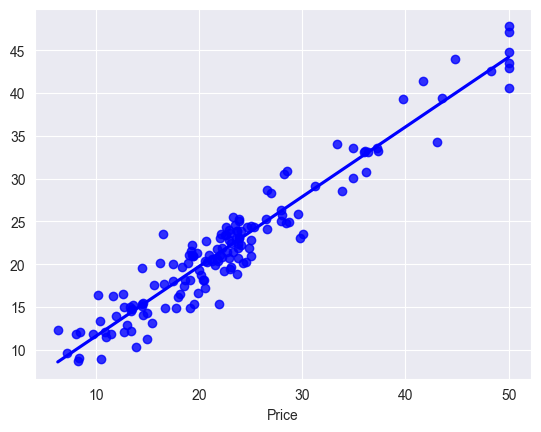

In [72]:
# regression plot
sns.regplot(x=y_test,y = pred, color="blue",ci=None,)

<AxesSubplot: xlabel='Price', ylabel='Count'>

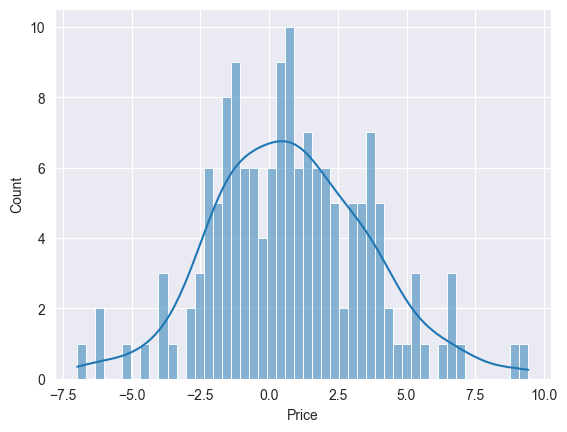

In [73]:
# Residual Plot
sns.histplot((y_test-pred),bins=50,kde = True)

Since the residuals follows a normal distribution, the model is ok for predictions

## Predictions

In [74]:
boston.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [75]:
model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

c:\Users\David Sanchez Jnr\Desktop\Machine Learning Projects\BostonHousePricing\BostonHousePricing\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([25.11032627])

### Pickle The Model File for Deployment

In [76]:
import pickle

In [ ]:
#Write a pickle file 
pickle.dump(model,open("XGMODEL.pkl", "wb"))

In [ ]:
# Read a pickle file
pickeled_model = pickle.load(open("XGMODEL.pkl","rb"))